<a href="https://colab.research.google.com/github/swethaT324/Analyzing-BounceRates-and-Conversions/blob/main/Analyzing_BounceRates_and_Conversions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Install required packages (only if not installed)
install.packages("ggplot2")
install.packages("corrplot")
install.packages("caret")

# Load libraries
library(ggplot2)
library(corrplot)
library(caret)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("caret"):
“installation of package ‘caret’ had non-zero exit status”


In [ ]:
# Read dataset
df <- read.csv("website_wata.csv", header = TRUE)

# Check the first few rows
head(df)


,Page.Views,Session.Duration,Bounce.Rate,Traffic.Source,Time.on.Page,Previous.Visits,Conversion.Rate
,<int>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>
1,5,11.051381,0.2306519,Organic,3.890460,3,1
2,4,3.429316,0.3910013,Social,8.478174,0,1
3,4,1.621052,0.3979861,Organic,9.636170,2,1
4,5,3.629279,0.1804577,Organic,2.071925,3,1
5,5,4.235843,0.2915409,Paid,1.960654,5,1
6,3,4.541868,0.4207400,Social,3.438712,2,1


In [ ]:
# Check for missing values
sum(is.na(df))

# Convert categorical column 'Traffic.Source' to a factor
df$Traffic.Source <- as.factor(df$Traffic.Source)

# Summary of the dataset
summary(df)

# Check structure
str(df)


[1] 0

   Page.Views    Session.Duration     Bounce.Rate        Traffic.Source
 Min.   : 0.00   Min.   : 0.003613   Min.   :0.007868   Direct  :216   
 1st Qu.: 3.00   1st Qu.: 0.815828   1st Qu.:0.161986   Organic :786   
 Median : 5.00   Median : 1.993983   Median :0.266375   Paid    :428   
 Mean   : 4.95   Mean   : 3.022045   Mean   :0.284767   Referral:301   
 3rd Qu.: 6.00   3rd Qu.: 4.197569   3rd Qu.:0.388551   Social  :269   
 Max.   :14.00   Max.   :20.290516   Max.   :0.844939                  
  Time.on.Page      Previous.Visits Conversion.Rate 
 Min.   : 0.06852   Min.   :0.000   Min.   :0.3437  
 1st Qu.: 1.93504   1st Qu.:1.000   1st Qu.:1.0000  
 Median : 3.31532   Median :2.000   Median :1.0000  
 Mean   : 4.02744   Mean   :1.978   Mean   :0.9821  
 3rd Qu.: 5.41463   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :24.79618   Max.   :9.000   Max.   :1.0000  

'data.frame':	2000 obs. of  7 variables:
 $ Page.Views      : int  5 4 4 5 5 3 5 4 6 7 ...
 $ Session.Duration: num  11.05 3.43 1.62 3.63 4.24 ...
 $ Bounce.Rate     : num  0.231 0.391 0.398 0.18 0.292 ...
 $ Traffic.Source  : Factor w/ 5 levels "Direct","Organic",..: 2 5 2 2 3 5 5 3 2 3 ...
 $ Time.on.Page    : num  3.89 8.48 9.64 2.07 1.96 ...
 $ Previous.Visits : int  3 0 2 3 5 2 1 5 1 5 ...
 $ Conversion.Rate : num  1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
# Summary of numerical columns
summary(df)

# Correlation analysis (numeric columns only)
cor_matrix <- cor(df[, sapply(df, is.numeric)])
print(cor_matrix)


   Page.Views    Session.Duration     Bounce.Rate        Traffic.Source
 Min.   : 0.00   Min.   : 0.003613   Min.   :0.007868   Direct  :216   
 1st Qu.: 3.00   1st Qu.: 0.815828   1st Qu.:0.161986   Organic :786   
 Median : 5.00   Median : 1.993983   Median :0.266375   Paid    :428   
 Mean   : 4.95   Mean   : 3.022045   Mean   :0.284767   Referral:301   
 3rd Qu.: 6.00   3rd Qu.: 4.197569   3rd Qu.:0.388551   Social  :269   
 Max.   :14.00   Max.   :20.290516   Max.   :0.844939                  
  Time.on.Page      Previous.Visits Conversion.Rate 
 Min.   : 0.06852   Min.   :0.000   Min.   :0.3437  
 1st Qu.: 1.93504   1st Qu.:1.000   1st Qu.:1.0000  
 Median : 3.31532   Median :2.000   Median :1.0000  
 Mean   : 4.02744   Mean   :1.978   Mean   :0.9821  
 3rd Qu.: 5.41463   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :24.79618   Max.   :9.000   Max.   :1.0000  

                  Page.Views Session.Duration Bounce.Rate Time.on.Page
Page.Views        1.00000000      -0.01278808  0.03022269   0.02394139
Session.Duration -0.01278808       1.00000000 -0.01593141  -0.01398535
Bounce.Rate       0.03022269      -0.01593141  1.00000000   0.03933978
Time.on.Page      0.02394139      -0.01398535  0.03933978   1.00000000
Previous.Visits   0.02859523      -0.02553421 -0.01586002  -0.02872932
Conversion.Rate   0.12663537       0.17779803 -0.04905104   0.22966876
                 Previous.Visits Conversion.Rate
Page.Views            0.02859523      0.12663537
Session.Duration     -0.02553421      0.17779803
Bounce.Rate          -0.01586002     -0.04905104
Time.on.Page         -0.02872932      0.22966876
Previous.Visits       1.00000000      0.10949602
Conversion.Rate       0.10949602      1.00000000


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



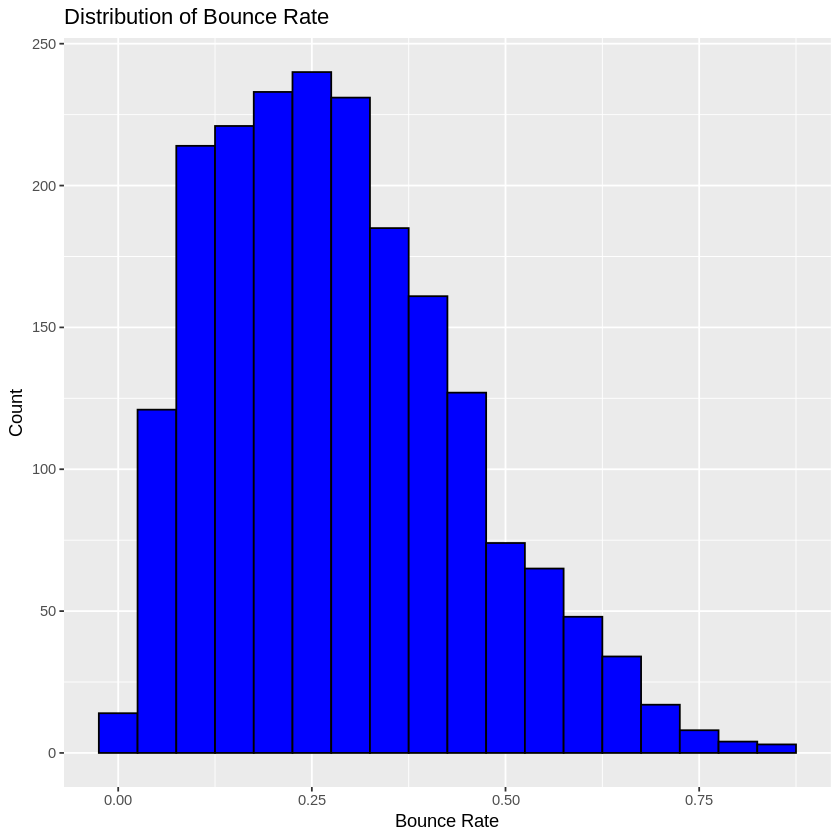

In [ ]:
# Install ggplot2 (if not already installed)
install.packages("ggplot2")

# Load ggplot2 package
library(ggplot2)

# Example ggplot visualization
ggplot(df, aes(x = Bounce.Rate)) +
  geom_histogram(binwidth = 0.05, fill = "blue", color = "black") +
  ggtitle("Distribution of Bounce Rate") +
  xlab("Bounce Rate") +
  ylab("Count")


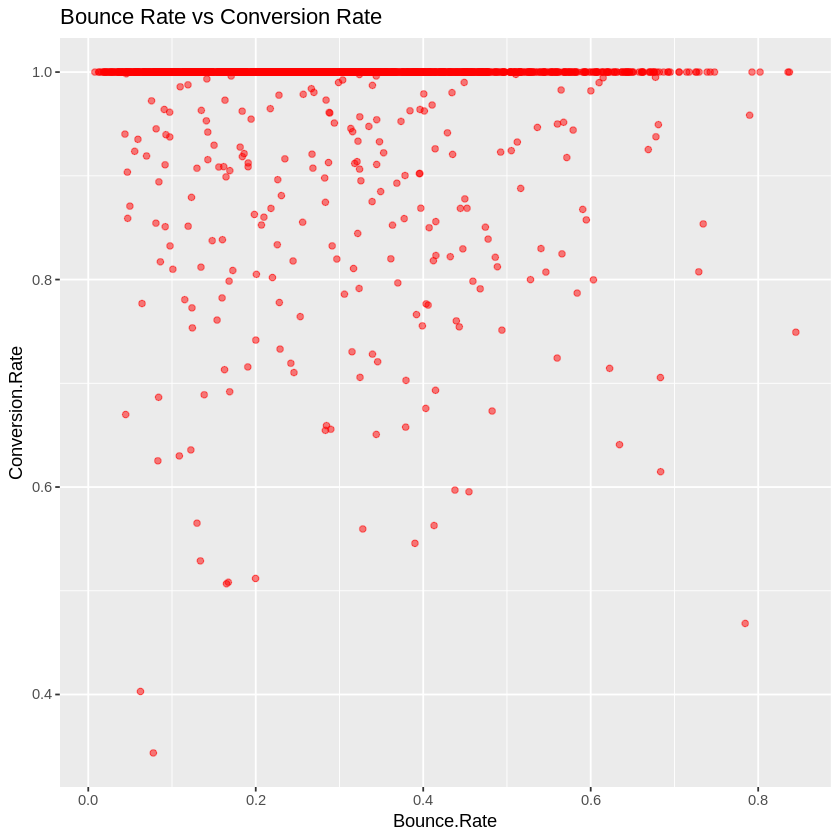

In [ ]:
ggplot(df, aes(x = Bounce.Rate, y = Conversion.Rate)) +
  geom_point(alpha = 0.5, color = "red") +
  labs(title = "Bounce Rate vs Conversion Rate")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



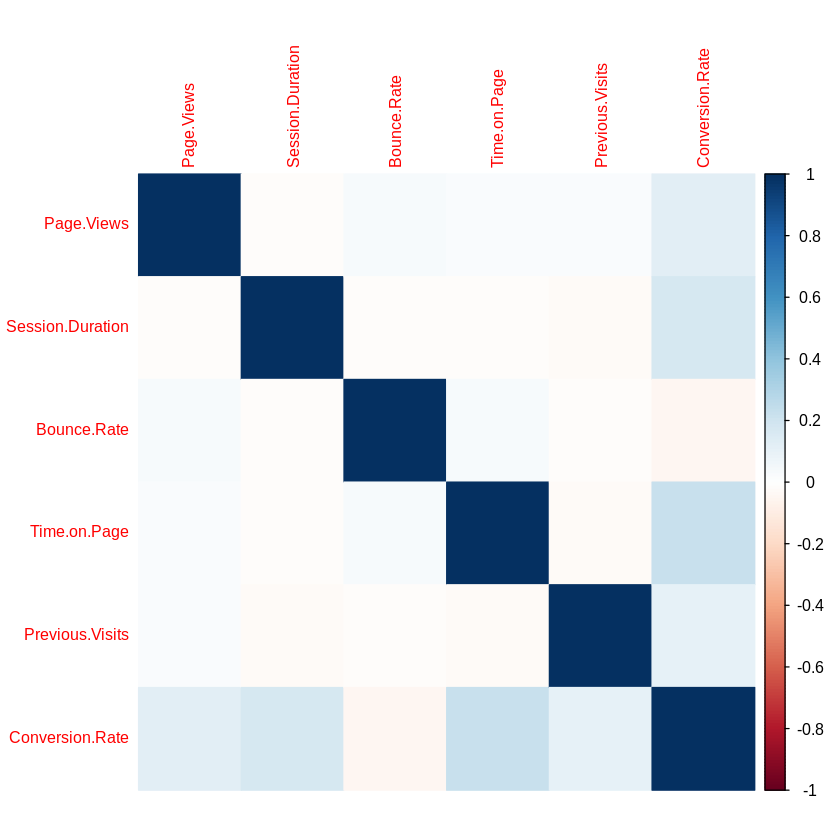

In [ ]:
# Install the corrplot package (if not installed)
install.packages("corrplot")

# Load the package
library(corrplot)

# Example correlation matrix plot
cor_matrix <- cor(df[, sapply(df, is.numeric)])  # Compute correlation matrix

corrplot(cor_matrix, method = "color", tl.cex = 0.8)



In [ ]:
# Install the caret package (if not installed)
install.packages("caret")

# Load the package
library(caret)

# Splitting the dataset into 80% training and 20% testing
set.seed(123)  # For reproducibility
trainIndex <- createDataPartition(df$Conversion.Rate, p = 0.8, list = FALSE)

# Create training and testing datasets
train_data <- df[trainIndex, ]
test_data <- df[-trainIndex, ]


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice



In [ ]:
# Train a model to predict Conversion Rate
model <- lm(Conversion.Rate ~ Bounce.Rate + Page.Views + Session.Duration + Time.on.Page, data = train_data)

# Model Summary
summary(model)



Call:
lm(formula = Conversion.Rate ~ Bounce.Rate + Page.Views + Session.Duration + 
    Time.on.Page, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61728 -0.00348  0.01557  0.02887  0.06279 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.9398867  0.0053630 175.255  < 2e-16 ***
Bounce.Rate      -0.0339169  0.0097288  -3.486 0.000503 ***
Page.Views        0.0036095  0.0007081   5.098 3.85e-07 ***
Session.Duration  0.0038803  0.0004996   7.767 1.42e-14 ***
Time.on.Page      0.0054182  0.0005382  10.068  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06242 on 1595 degrees of freedom
Multiple R-squared:  0.1095,	Adjusted R-squared:  0.1072 
F-statistic: 49.01 on 4 and 1595 DF,  p-value: < 2.2e-16


In [ ]:
# Predict on test data
predictions <- predict(model, test_data)

# Compare actual vs predicted values
comparison <- data.frame(Actual = test_data$Conversion.Rate, Predicted = predictions)
print(head(comparison))


   Actual Predicted
3       1 0.9993271
7       1 0.9757951
15      1 1.0275839
21      1 1.0374674
22      1 0.9562442
25      1 0.9989315


In [ ]:
rmse <- sqrt(mean((test_data$Conversion.Rate - predictions)^2))
print(paste("RMSE:", rmse))


[1] "RMSE: 0.0615729327888158"
